# Ejercicio covid-19

importamos las librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings as wr
wr.filterwarnings('ignore')

Cargamos el dataset

In [3]:
covid_df = pd.read_csv('Casos_positivos_de_COVID-19_en_Colombia.csv')
display(
    covid_df.head(),
    covid_df.shape
)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


(4852323, 23)

In [3]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852323 entries, 0 to 4852322
Data columns (total 23 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   fecha reporte web             object 
 1   ID de caso                    int64  
 2   Fecha de notificación         object 
 3   Código DIVIPOLA departamento  int64  
 4   Nombre departamento           object 
 5   Código DIVIPOLA municipio     int64  
 6   Nombre municipio              object 
 7   Edad                          int64  
 8   Unidad de medida de edad      int64  
 9   Sexo                          object 
 10  Tipo de contagio              object 
 11  Ubicación del caso            object 
 12  Estado                        object 
 13  Código ISO del país           float64
 14  Nombre del país               object 
 15  Recuperado                    object 
 16  Fecha de inicio de síntomas   object 
 17  Fecha de muerte               object 
 18  Fecha de diagnóstico  

In [4]:
sorted(covid_df.columns)

['Código DIVIPOLA departamento',
 'Código DIVIPOLA municipio',
 'Código ISO del país',
 'Edad',
 'Estado',
 'Fecha de diagnóstico',
 'Fecha de inicio de síntomas',
 'Fecha de muerte',
 'Fecha de notificación',
 'Fecha de recuperación',
 'ID de caso',
 'Nombre del grupo étnico',
 'Nombre del país',
 'Nombre departamento',
 'Nombre municipio',
 'Pertenencia étnica',
 'Recuperado',
 'Sexo',
 'Tipo de contagio',
 'Tipo de recuperación',
 'Ubicación del caso',
 'Unidad de medida de edad',
 'fecha reporte web']

In [5]:
covid_df['Edad'].describe()

count    4.852323e+06
mean     3.954936e+01
std      1.790326e+01
min      1.000000e+00
25%      2.700000e+01
50%      3.700000e+01
75%      5.200000e+01
max      1.140000e+02
Name: Edad, dtype: float64

In [6]:
covid_df.loc[(covid_df['Sexo'] == 'f'),['Sexo']] = 'F'
covid_df.loc[(covid_df['Sexo'] == 'm'),['Sexo']] = 'M'
covid_df.loc[(covid_df['Estado'] == 'leve'),['Estado']] = 'Leve'
covid_df.loc[(covid_df['Estado'] == 'LEVE'),['Estado']] = 'Leve'

In [7]:
df = covid_df.groupby(['Sexo', 'Estado'])['ID de caso'].count()
df

Sexo  Estado   
F     Fallecido      47744
      Grave           1088
      Leve         2481446
      Moderado        8651
M     Fallecido      75209
      Grave           1497
      Leve         2211047
      Moderado        8957
Name: ID de caso, dtype: int64

In [8]:
df = covid_df.groupby(['Sexo', 'Estado'])['Edad'].mean()
df

Sexo  Estado   
F     Fallecido    68.793922
      Grave        52.006434
      Leve         39.017059
      Moderado     48.582360
M     Fallecido    66.764762
      Grave        50.816299
      Leve         38.297667
      Moderado     49.017863
Name: Edad, dtype: float64

In [9]:
df = covid_df.groupby(['Sexo', 'Estado'])['Edad'].max()
df

Sexo  Estado   
F     Fallecido    108
      Grave         98
      Leve         114
      Moderado     111
M     Fallecido    110
      Grave         94
      Leve         114
      Moderado      99
Name: Edad, dtype: int64

In [10]:
df = covid_df.groupby(['Sexo', 'Estado'])['Edad'].min()
df

Sexo  Estado   
F     Fallecido    1
      Grave        1
      Leve         1
      Moderado     1
M     Fallecido    1
      Grave        1
      Leve         1
      Moderado     1
Name: Edad, dtype: int64

filtramos los casos fallecidos

In [11]:
fallecidos_df = covid_df[(covid_df['Estado']=='Fallecido')]


In [12]:
cantidad_fallecidos = len(fallecidos_df)
cantidad_fallecidos

122953

Filtramos por los fallecidos que están por debajo de la edad promedio

In [13]:
fallecidos_promedio_df = fallecidos_df.groupby('Estado')['Edad'].transform('mean')

In [14]:
display(
    fallecidos_promedio_df.head(),
    len(fallecidos_promedio_df)
)

151    67.552707
152    67.552707
156    67.552707
187    67.552707
196    67.552707
Name: Edad, dtype: float64

122953

In [15]:
fallecidos_df['mean'] = fallecidos_promedio_df

In [16]:
display(
    fallecidos_df[['ID de caso', 'Edad', 'mean']].head(),
    len(fallecidos_df)
)

,ID de caso,Edad,mean
151,152,65,67.552707
152,153,53,67.552707
156,157,88,67.552707
187,188,70,67.552707
196,197,58,67.552707


122953

In [17]:
df = fallecidos_df[fallecidos_df['Edad'] < fallecidos_df['mean']]

In [18]:
display(
    df[['ID de caso', 'Edad', 'mean']].head(),
    len(df)
)

,ID de caso,Edad,mean
151,152,65,67.552707
152,153,53,67.552707
196,197,58,67.552707
231,232,59,67.552707
260,261,61,67.552707


57172

In [19]:
menores_fallecidos_df = fallecidos_df[fallecidos_df['Edad'] < 18]

In [20]:
display(
    menores_fallecidos_df[['ID de caso', 'Edad']].head(),
    len(menores_fallecidos_df)
)

,ID de caso,Edad
1573,1574,3
3963,3964,1
6643,6684,1
9492,9533,7
10626,10667,3


218

conteo de menores de edad fallecidos por departamento

In [21]:
df = menores_fallecidos_df.groupby('Nombre departamento')['ID de caso'].count()
display(df.to_frame())

,ID de caso
Nombre departamento,
AMAZONAS,2
ANTIOQUIA,16
ARAUCA,1
ATLANTICO,14
BARRANQUILLA,7
BOGOTA,34
BOLIVAR,6
BOYACA,6
CALDAS,2


In [22]:
df_por_dep = df.to_frame()
df_por_dep.columns = ['Casos']
df_por_dep.head()

,Casos
Nombre departamento,
AMAZONAS,2
ANTIOQUIA,16
ARAUCA,1
ATLANTICO,14
BARRANQUILLA,7


In [23]:
df_por_dep = df_por_dep.sort_values(by='Casos', ascending=False)

In [24]:
df_top_fall = df_por_dep.head(10)

In [25]:
df_top_fall

,Casos
Nombre departamento,
BOGOTA,34
ANTIOQUIA,16
VALLE,14
ATLANTICO,14
CESAR,11
CUNDINAMARCA,11
SANTANDER,11
CORDOBA,10
NORTE SANTANDER,9


In [26]:
covid_df

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852318,11/8/2021 0:00:00,4852359,29/3/2021 0:00:00,47001,STA MARTA D.E.,47001,SANTA MARTA,58,1,M,...,NaN,NaN,Activo,25/3/2021 0:00:00,NaN,9/4/2021 0:00:00,NaN,NaN,NaN,NaN
4852319,11/8/2021 0:00:00,4852360,29/3/2021 0:00:00,47001,STA MARTA D.E.,47001,SANTA MARTA,53,1,F,...,NaN,NaN,Activo,25/3/2021 0:00:00,NaN,9/4/2021 0:00:00,NaN,NaN,NaN,NaN
4852320,11/8/2021 0:00:00,4852361,29/3/2021 0:00:00,47001,STA MARTA D.E.,47001,SANTA MARTA,44,1,F,...,NaN,NaN,Activo,25/3/2021 0:00:00,NaN,9/4/2021 0:00:00,NaN,NaN,NaN,NaN
4852321,11/8/2021 0:00:00,4852362,29/3/2021 0:00:00,47001,STA MARTA D.E.,47001,SANTA MARTA,42,1,F,...,NaN,NaN,Activo,25/3/2021 0:00:00,NaN,9/4/2021 0:00:00,NaN,NaN,NaN,NaN


Vamos a agregar la clasificación de casos __internos__ y __foraneos__ al dataframe original

- agregar dos columnas aplicando una funcion que definimos usando __lambdas__ y aplicamos usando __map__

In [27]:
covid_df['internos'] = covid_df['Nombre del país'].map(
    lambda x: 1 if pd.isna(x) else 0
)

In [28]:
covid_df[['ID de caso','Nombre del país','internos']].head()

,ID de caso,Nombre del país,internos
0,1,ITALIA,0
1,2,ESPAÑA,0
2,3,ESPAÑA,0
3,4,NaN,1
4,5,NaN,1


In [29]:
covid_df['foraneos'] = covid_df['Nombre del país'].map(
    lambda x: 1 if not pd.isna(x) else 0
)

In [30]:
covid_df[['ID de caso','Nombre del país','internos','foraneos']].head()

,ID de caso,Nombre del país,internos,foraneos
0,1,ITALIA,0,1
1,2,ESPAÑA,0,1
2,3,ESPAÑA,0,1
3,4,NaN,1,0
4,5,NaN,1,0


In [31]:
foraneos = covid_df.foraneos.sum() / covid_df.foraneos.count() * 100
internos = covid_df.internos.sum() / covid_df.internos.count() * 100

display(
    "Casos foraneos {:4.2f} %".format(foraneos),
    "Casos internos {:4.2f} %".format(internos)
)

'Casos foraneos 0.06 %'

'Casos internos 99.94 %'

# Ejercicio propuesto

De los casos __foraneos__ generar las siguientes estadísticas:
- Cantidad de casos por país
- Cantidad de casos recuperados y fallecidos por país
- procentaje por país de casos recuperados y fallecidos

In [61]:
foraneos_df = covid_df[(covid_df['foraneos']==1)]
type(foraneos_df)


pandas.core.frame.DataFrame

In [80]:
df = foraneos_df.groupby(['Nombre del país','Recuperado'])['ID de caso'].transform('count')

In [82]:
foraneos_df['cpr'] = df

In [83]:
df = foraneos_df.groupby(['Nombre del país'])['ID de caso'].transform('count')

In [84]:
foraneos_df['cp'] = df

In [87]:
foraneos_df[['Nombre del país','Recuperado','cp','cpr']].sort_values(['Nombre del país','Recuperado'])

,Nombre del país,Recuperado,cp,cpr
1419736,AFGANISTÁN,Fallecido,3,1.0
1618763,AFGANISTÁN,Recuperado,3,2.0
4494052,AFGANISTÁN,Recuperado,3,2.0
772915,ALBANIA,Fallecido,3,1.0
2106548,ALBANIA,Recuperado,3,2.0
...,...,...,...,...
1820042,VENEZUELA,Recuperado,96,73.0
1835093,VENEZUELA,Recuperado,96,73.0
1910489,VENEZUELA,Recuperado,96,73.0
1943004,VENEZUELA,Recuperado,96,73.0


In [88]:
def x(a,b):
    return a / b

foraneos_df['res']  = foraneos_df.apply(lambda f: x(f['cpr'],f['cp']), axis=1)

In [89]:
foraneos_df[['Nombre del país','Recuperado','cp','cpr','res']].sort_values(['Nombre del país','Recuperado'])

,Nombre del país,Recuperado,cp,cpr,res
1419736,AFGANISTÁN,Fallecido,3,1.0,0.333333
1618763,AFGANISTÁN,Recuperado,3,2.0,0.666667
4494052,AFGANISTÁN,Recuperado,3,2.0,0.666667
772915,ALBANIA,Fallecido,3,1.0,0.333333
2106548,ALBANIA,Recuperado,3,2.0,0.666667
...,...,...,...,...,...
1820042,VENEZUELA,Recuperado,96,73.0,0.760417
1835093,VENEZUELA,Recuperado,96,73.0,0.760417
1910489,VENEZUELA,Recuperado,96,73.0,0.760417
1943004,VENEZUELA,Recuperado,96,73.0,0.760417


In [98]:
foraneos_df.groupby(['Nombre del país','Recuperado','res'])['cpr'].max()

Nombre del país  Recuperado  res     
AFGANISTÁN       Fallecido   0.333333     1.0
                 Recuperado  0.666667     2.0
ALBANIA          Fallecido   0.333333     1.0
                 Recuperado  0.666667     2.0
ALEMANIA         Fallecido   0.055556     1.0
                                         ... 
UCRANIA          Recuperado  1.000000     1.0
URUGUAY          Recuperado  1.000000     4.0
VENEUELA         Recuperado  1.000000     1.0
VENEZUELA        Fallecido   0.239583    23.0
                 Recuperado  0.760417    73.0
Name: cpr, Length: 106, dtype: float64

# Gráfica de ejemplo

In [64]:
df = covid_df.groupby(['Nombre departamento'])['ID de caso'].count().reset_index()
df.columns = ['departamento', 'casos']
df['total'] = df['casos'].sum()
df['porcentaje']= df['casos']/df['total']*100
df = df.sort_values('casos', ascending=False)
df = df.head(5)
df

,departamento,casos,total,porcentaje
5,BOGOTA,1429091,4852323,29.451687
1,ANTIOQUIA,724626,4852323,14.933590
35,VALLE,393111,4852323,8.101501
16,CUNDINAMARCA,260315,4852323,5.364750
30,SANTANDER,221838,4852323,4.571790


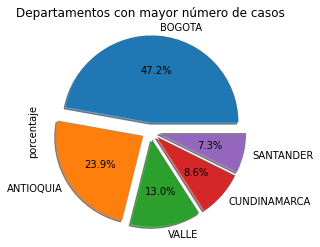

In [71]:
df.index = df['departamento']
df.plot.pie(
    y = 'porcentaje',
    legend=False,
    autopct='%1.1f%%',
    title="Departamentos con mayor número de casos",
    explode=(0.1, 0.1, 0.1, 0.1, 0.1),
    shadow=True,
    startangle=0
)
plt.show()

In [78]:
deps = list(df.index)
c = list(df.casos)


lista = []
for i in range(len(deps)):
    lista.append("{} ({})".format(deps[i], int(c[i]/1000)))


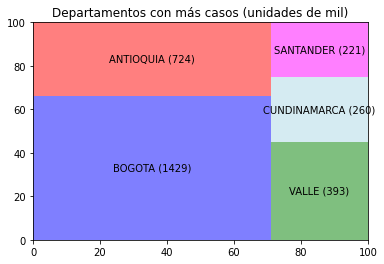

In [79]:
import squarify

squarify.plot(
    sizes=df['casos'],
    label=lista,
    color=['blue','red','green','lightblue','magenta'],
    alpha=0.5
)
plt.title("Departamentos con más casos (unidades de mil)")
plt.show()